In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import random
import torch
import torchvision
from torch import nn
from IPython import display
from torch.utils import data
from d2l import torch as d2l
from matplotlib import pyplot as plt
from utils import d2lhelper

In [2]:
batch_size = 256
dataloader_worker_count = 4
train_iter, test_iter = d2lhelper.load_data_fashion_mnist(batch_size, dataloader_worker_count)

In [3]:
num_inputs, num_outputs, num_hidden = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hidden, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hidden, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hidden, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return (H @ W2 + b2)

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

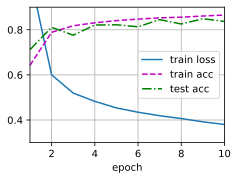

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

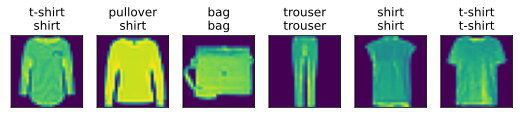

In [8]:
d2l.predict_ch3(net, test_iter)